In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys as keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import time
import matplotlib.pyplot as plt
from PIL import Image
import lxml.html
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import sqlite3
import tqdm

% matplotlib inline

## phantomJS
### desired capabilities
- UA指定

In [7]:
def show_img(path):
    img = Image.open(path)
    plt.figure(figsize=(20,10))
    plt.imshow(img)
#     plt.cla('all')

## クローリング&スクレイピング

In [63]:
import pandas as pd
for i in pd.date_range('20170401','20170816'):
    print(i.strftime('%Y-%m-%d'))

2017-04-01
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06
2017-04-07
2017-04-08
2017-04-09
2017-04-10
2017-04-11
2017-04-12
2017-04-13
2017-04-14
2017-04-15
2017-04-16
2017-04-17
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-22
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2017-04-28
2017-04-29
2017-04-30
2017-05-01
2017-05-02
2017-05-03
2017-05-04
2017-05-05
2017-05-06
2017-05-07
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-19
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-28
2017-05-29
2017-05-30
2017-05-31
2017-06-01
2017-06-02
2017-06-03
2017-06-04
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-10
2017-06-11
2017-06-12
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30

In [ ]:
import pandas as pd
import urllib.request
import sqlite3

des_cap = dict(DesiredCapabilities.PHANTOMJS)
des_cap['phantomjs.page.settings.userAgent'] = (
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) '
    'Chrome/28.0.1500.52 Safari/537.36'
)
 
driver = webdriver.PhantomJS(desired_capabilities=des_cap)

# 画像ファイル名とview数の対応づけ
cnt = 0

conn = sqlite3.connect("naver_views.db")
cur = conn.cursor()
cur.execute("""create table if not exists views (id int, view int)""")

for i in pd.date_range('20170401','20170816'):
    date_str = i.strftime('%Y-%m-%d')
    main_url = 'http://naver-matome.appspot.com/?category=&type=view&filterDate={}'.format(date_str)
    urls = []
    views = []
    
    # ページオープン&パース
    driver.get(main_url)
    data = driver.page_source
    bs = BeautifulSoup(data,"lxml")

    # 画像URL&view数取得
    for i in bs.find_all(attrs={"class":"article"}):
        urls.append(i.find("img")['src'])
        views.append(i.find("span",attrs={"style":"margin:10px 5px 10px 10px;color:#FF8C00"}).text)
    
    views = [int(v.split()[1].strip()) for v in views]
    
    # 画像ファイルのURLを開く
    for i,url in enumerate(urls):
        try:
            request = urllib.request.urlopen(url)
        except:
            continue
    
        # 画像保存
        f = open('2ch/{}.jpg'.format(cnt), "wb")
        f.write(request.read())

        # ファイルを閉じる
        f.close()
        
        # 保存した画像と同じIDでview数保存
        cur.execute("""insert into views values ({0},{1})""".format(cnt, views[i]))
    
        cnt += 1
    
conn.close()
driver.quit()

In [37]:
main_url = 'http://naver-matome.appspot.com/?category=&type=view&filterDate=2017-08-14'
 
des_cap = dict(DesiredCapabilities.PHANTOMJS)
des_cap['phantomjs.page.settings.userAgent'] = (
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) '
    'Chrome/28.0.1500.52 Safari/537.36'
)
 
driver = webdriver.PhantomJS(desired_capabilities=des_cap)

views = []

# トップページ開く
driver.get(main_url)
# driver.save_screenshot('./2ch/main.png')

data = driver.page_source
bs = BeautifulSoup(data,"lxml")
for i in bs.find_all(attrs={"class":"article"}):
    views.append(i.find("span",attrs={"style":"margin:10px 5px 10px 10px;color:#FF8C00"}).text)
    
driver.quit()

In [38]:
views = [int(v.split()[1].strip()) for v in views]
for v in views:
    print(v)

427019
369526
331048
236438
227145
223401
198050
194141
192754
189104
161364
158491
145011
143971
139648
139397
132916
131451
130096
124086
123282
121054
103047
102452
98069
97483
93345
83477
83194
79915
70847
70387
68052
67459
60612
59965
58963
54198
52620
47250
45010
40297
38767
34376
33176
31732
30678
25766
23838
23550
22904
22571
21759
21601
20624
19331
16120
15290
15217
14420
14283
13600
13184
13074
13047
12893
12137
9284
7816
7729
7637
7631
6961
4677
3893
3202
2887
2758
2731
2324
2300
2223
2202
2191
1938
1638
1338
1265
1003
1002
583


In [14]:
len(urls)

91

In [19]:
# 全画像取得

import urllib.request

# 画像ファイルのURLを開く
# （urlに画像ファイルのURLを指定）
for cnt,url in enumerate(urls):
    request = urllib.request.urlopen(url)

    # ファイルをバイナリモードで開き、URLの内容を書き込み
    # （file_nameに保存時のファイル名を指定）
    f = open('2ch/{}.jpg'.format(cnt), "wb")
    f.write(request.read())

    # ファイルを閉じる
    f.close()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


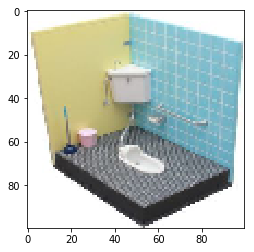

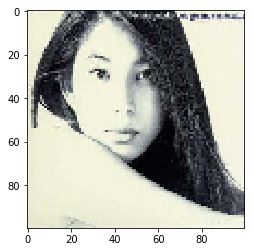

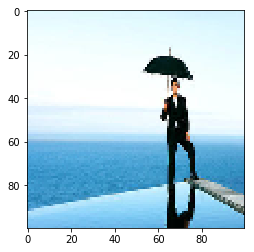

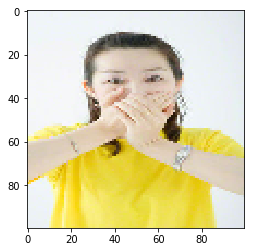

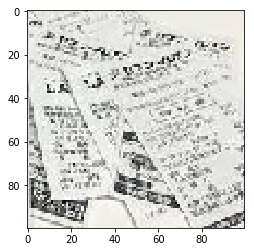

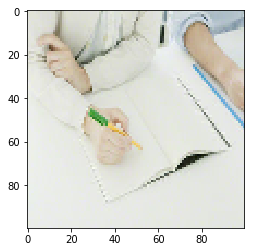

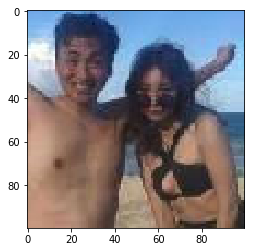

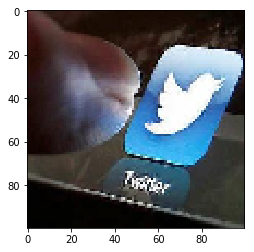

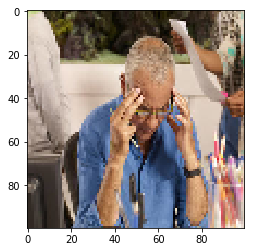

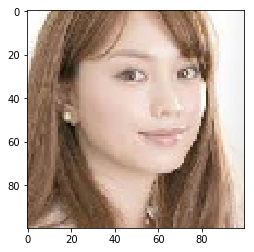

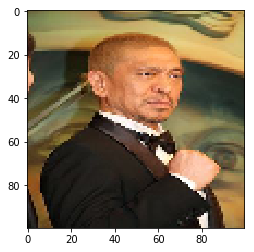

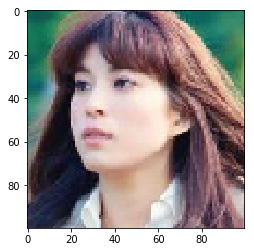

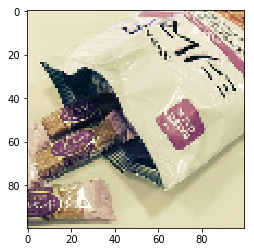

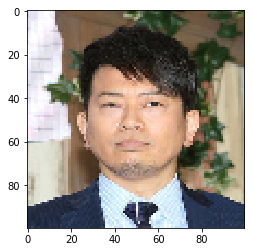

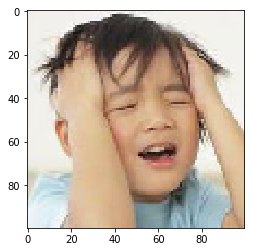

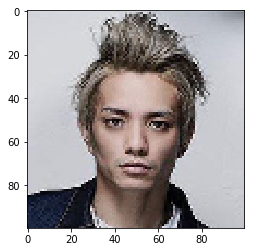

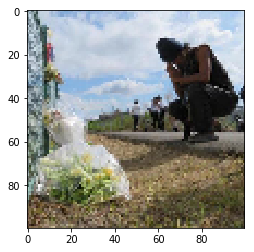

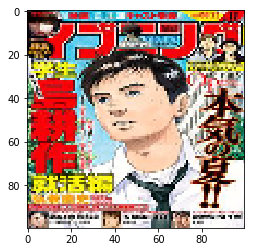

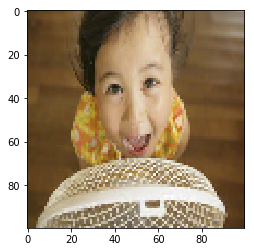

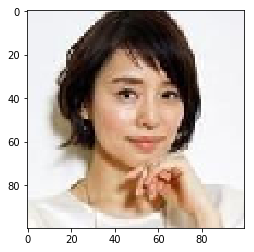

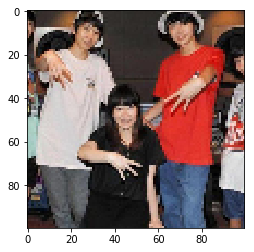

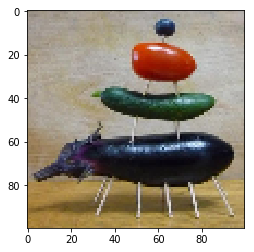

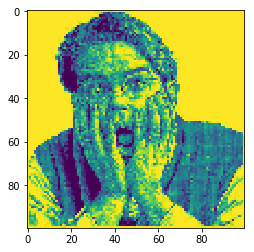

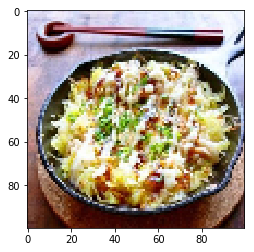

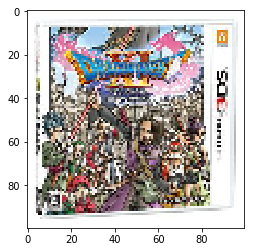

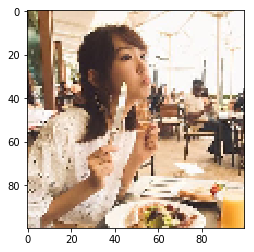

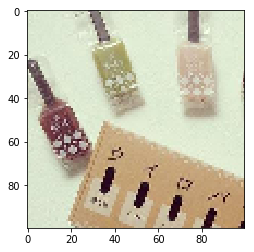

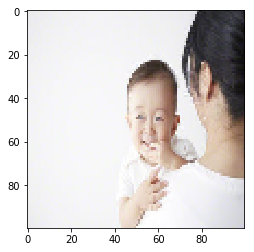

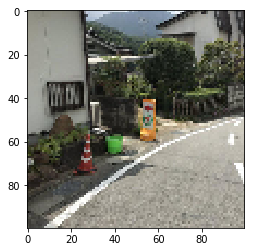

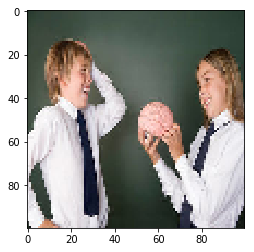

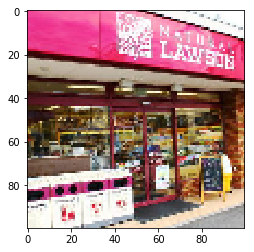

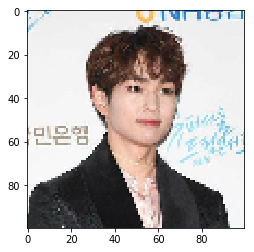

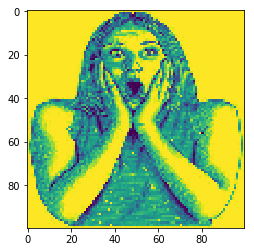

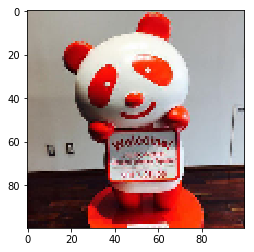

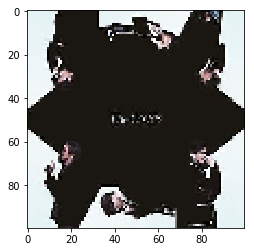

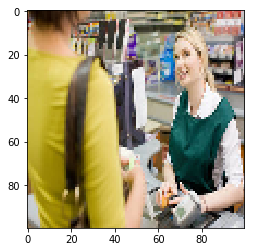

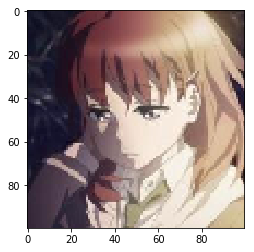

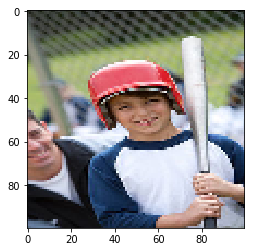

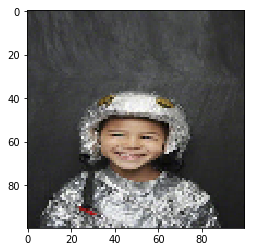

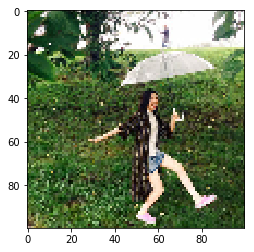

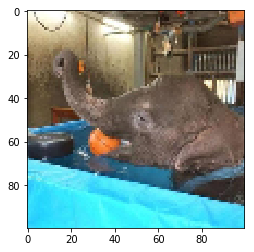

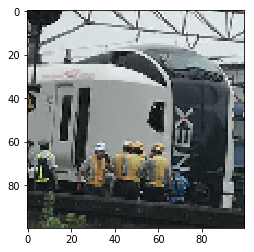

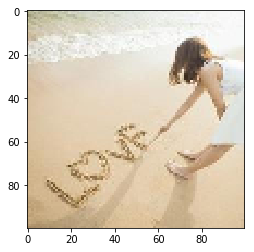

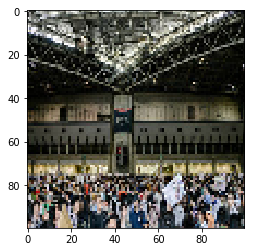

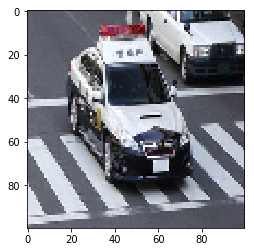

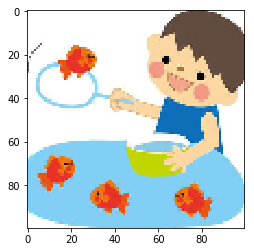

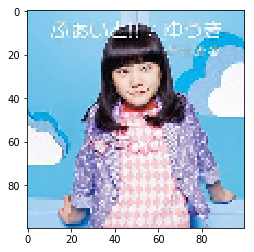

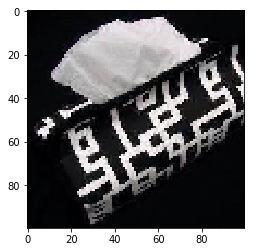

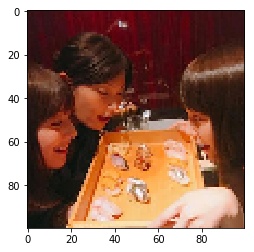

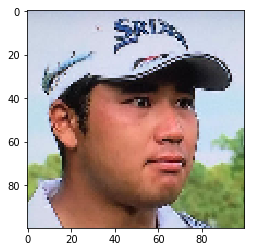

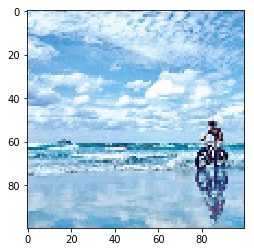

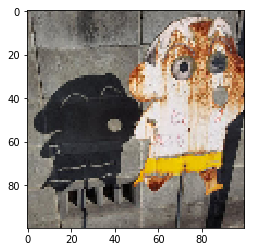

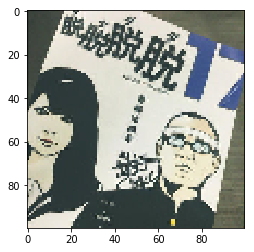

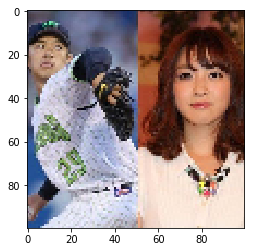

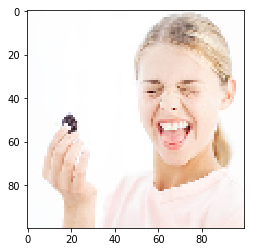

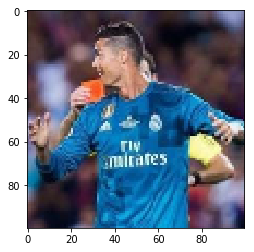

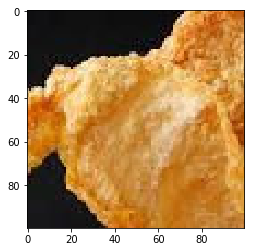

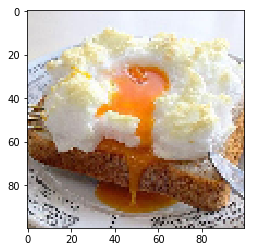

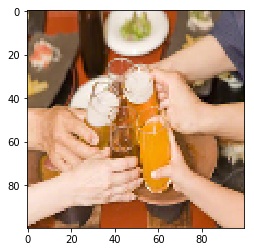

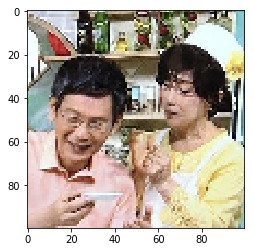

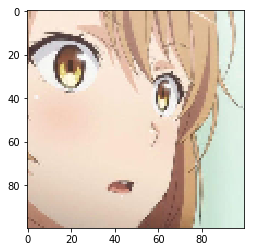

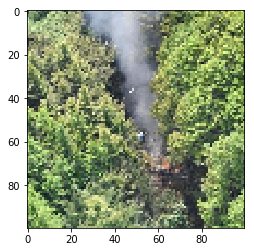

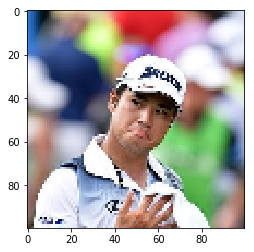

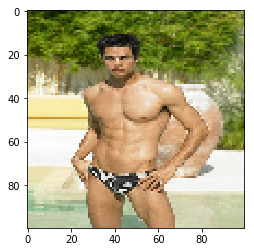

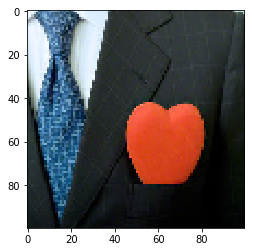

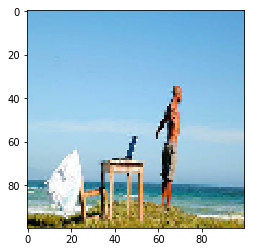

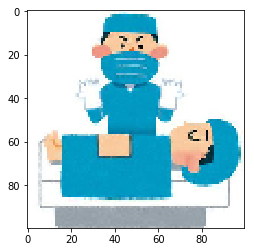

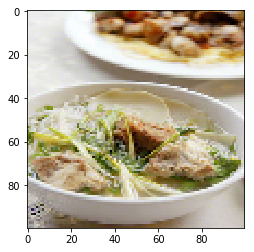

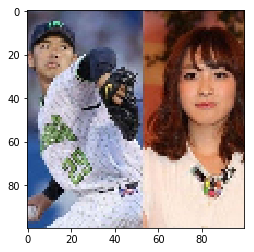

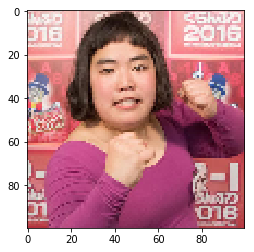

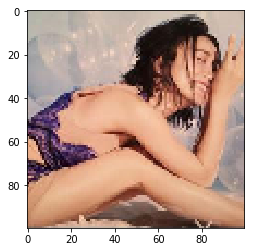

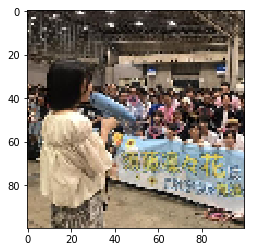

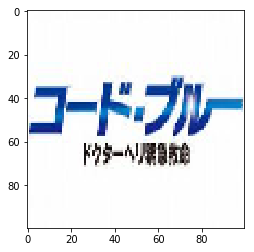

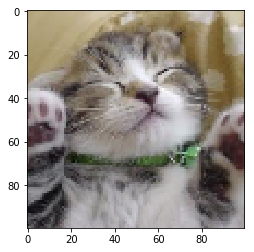

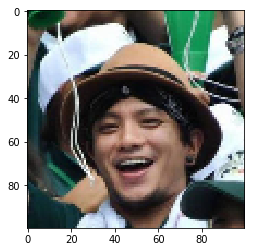

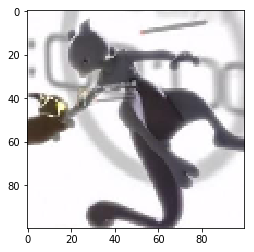

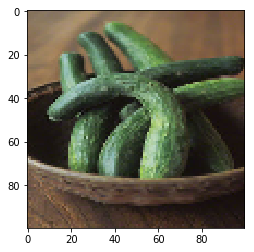

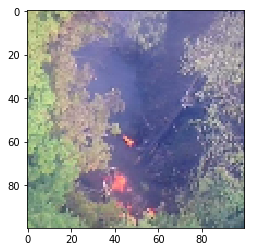

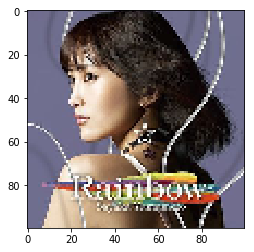

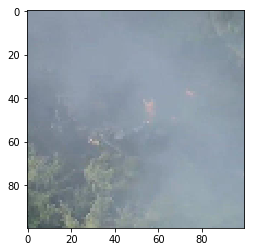

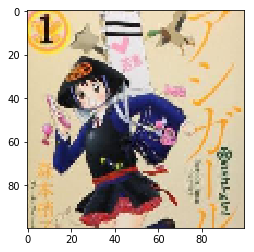

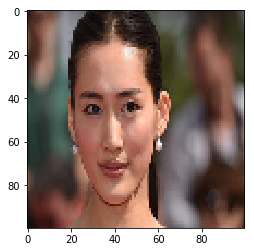

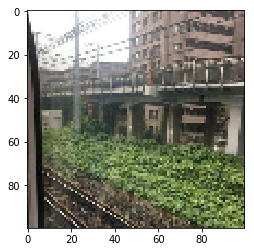

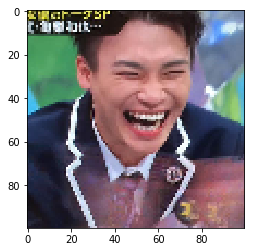

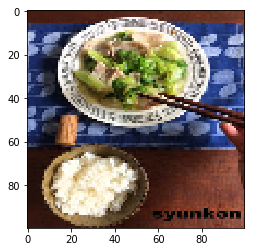

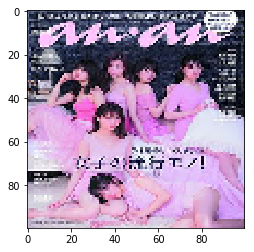

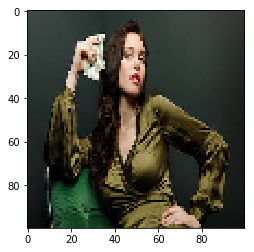

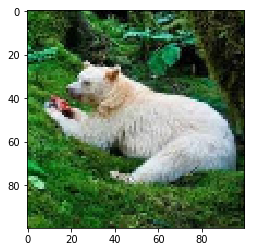

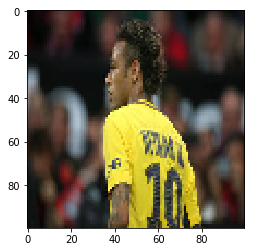

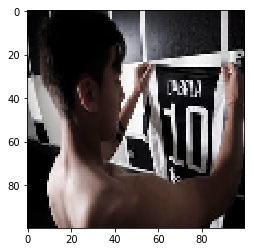

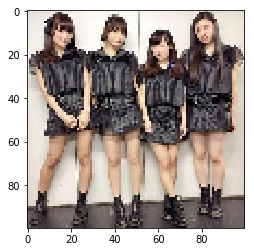

In [30]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

for i in glob.glob("2ch/*"):
    img = Image.open(i)
    img = img.resize((100,100))
    plt.figure()
    plt.imshow(img)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [59]:
x_train = np.empty((0,100,100,3), float)
y_train = []

for i in glob.glob("2ch/*"):
    img = Image.open(i)
    img = img.resize((100,100))
    img_array = np.array(img, 'f')
    img_array /= 255.
    if len(img_array.shape) == 2:
        print(i);continue
        
    y_train.append(views[int(i.split(".")[0].split('/')[-1])])
        
#     x_train.append(img_array)

    x_train = np.append(x_train,img_array.reshape(-1,100,100,3),axis=0)
    
print(x_train.shape)
# x_train = np.array(x_train)
# print(x_train.shape)

2ch/22.jpg
2ch/32.jpg
(89, 100, 100, 3)
